### Reinforcement Learning

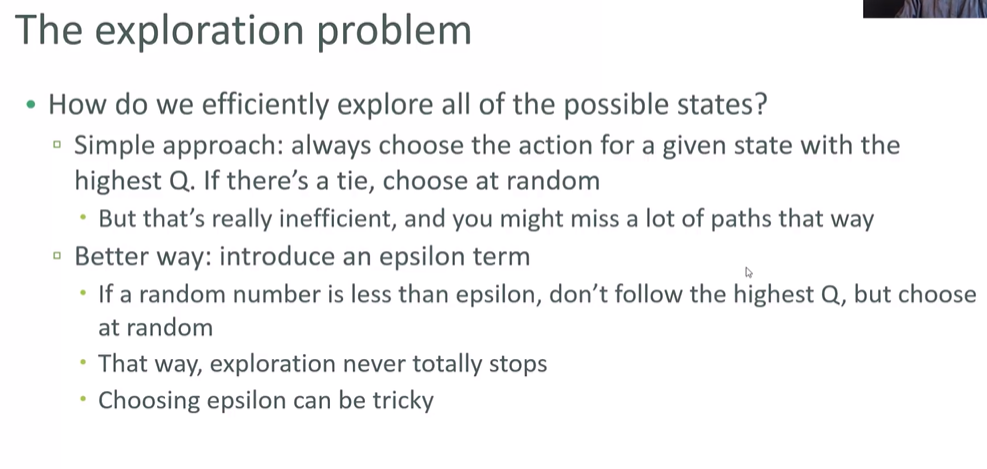

In [1]:
import gym
import random

random.seed(2020)

In [2]:
streets = gym.make("Taxi-v3").env
streets.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



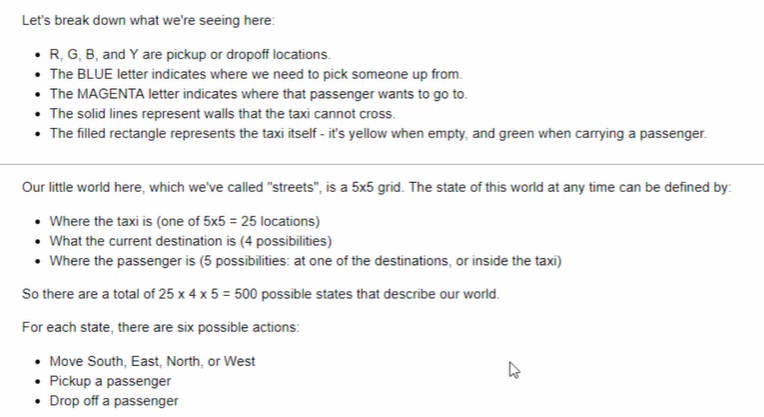

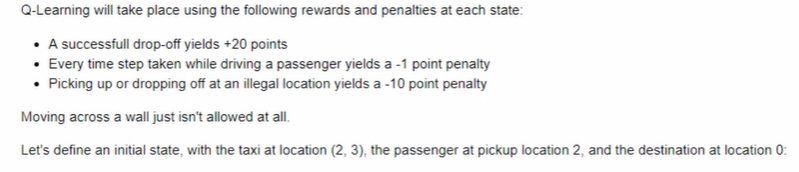

In [3]:
initial_state = streets.encode(2, 3, 2, 0)

streets.s = initial_state

streets.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Reward table for initial state

In [4]:
streets.P[initial_state]

{0: [(1.0, 368, -1, False)],
 1: [(1.0, 168, -1, False)],
 2: [(1.0, 288, -1, False)],
 3: [(1.0, 248, -1, False)],
 4: [(1.0, 268, -10, False)],
 5: [(1.0, 268, -10, False)]}

In [7]:
import numpy as np

In [13]:
q_table = np.zeros([streets.observation_space.n, streets.action_space.n])

learning_rate = 0.1
discount_factor = 0.6
exploration = 0.1
epochs = 10000

for taxi_run in range(epochs):
    state = streets.reset()
    done = False
    
    while not done:
        random_value = random.uniform(0, 1)
        if random_value < exploration:
            action = streets.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        next_state, reward, done, info = streets.step(action)
        
        prev_q = q_table[state, action]
        next_max_q = np.max(q_table[next_state])
        new_q = (1 - learning_rate) * prev_q + learning_rate * (reward + discount_factor * next_max_q)
        q_table[state, action] = new_q
        
        state = next_state

In [14]:
q_table[initial_state]

array([-2.42183261, -2.41198054, -2.40077085, -2.3639511 , -7.73977613,
       -8.61763809])

In [ ]:
from IPython.display import clear_output
from time import sleep

for tripnum in range(1, 11):
    state = streets.reset()
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        next_state, reward, done, info = streets.step(action)
        clear_output(wait=True)
        print("Trip number - {}".format(str(tripnum)))
        print(streets.render(mode="ansi"))
        sleep(.5)
        state = next_state
    sleep(2)

Trip number - 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

